In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy.signal import find_peaks
%matplotlib widget

In [8]:
def avg_visibility(data,name,down,up):
    
    # Data analysis pipeline
    ds = pd.read_csv(data, header=1)
    ds_filtered = ds.loc[down:up]['raw data']
    
    window_size = 80
    mean = ds_filtered.rolling(window = window_size).sum() / window_size
    mean = mean.shift(int(-window_size/2)).dropna()
    
    # Root-mean squared
    subtraction = (ds_filtered - mean).dropna()
    subtraction_squared = [x**2 for x in subtraction]
    rms = math.sqrt(sum(subtraction_squared)/len(subtraction))
    upper_limit = mean + rms
    lower_limit = mean - rms
    vis = rms / mean.dropna()
    
    '''
   # Plotting
    plt.close("all")
    fig, ax = plt.subplots(2,1, figsize=(8,11))
    ax[0].plot(ds['raw data'], label=name)
    ax[0].plot(mean.index,mean)
    ax[0].plot(mean.index,upper_limit)
    ax[0].plot(mean.index,lower_limit)
    ax[0].legend()
    ax[0].set_ylabel("Brightness (a.u.)")
    ax[0].set_xlabel("Position (a.u.)")
    
    ax[1].plot(vis, label=name)
    ax[1].legend()
    ax[1].set_ylabel("Visibility")
    ax[1].set_xlabel("Index")
    
    plt.show()
    '''
        
    return np.average(vis)

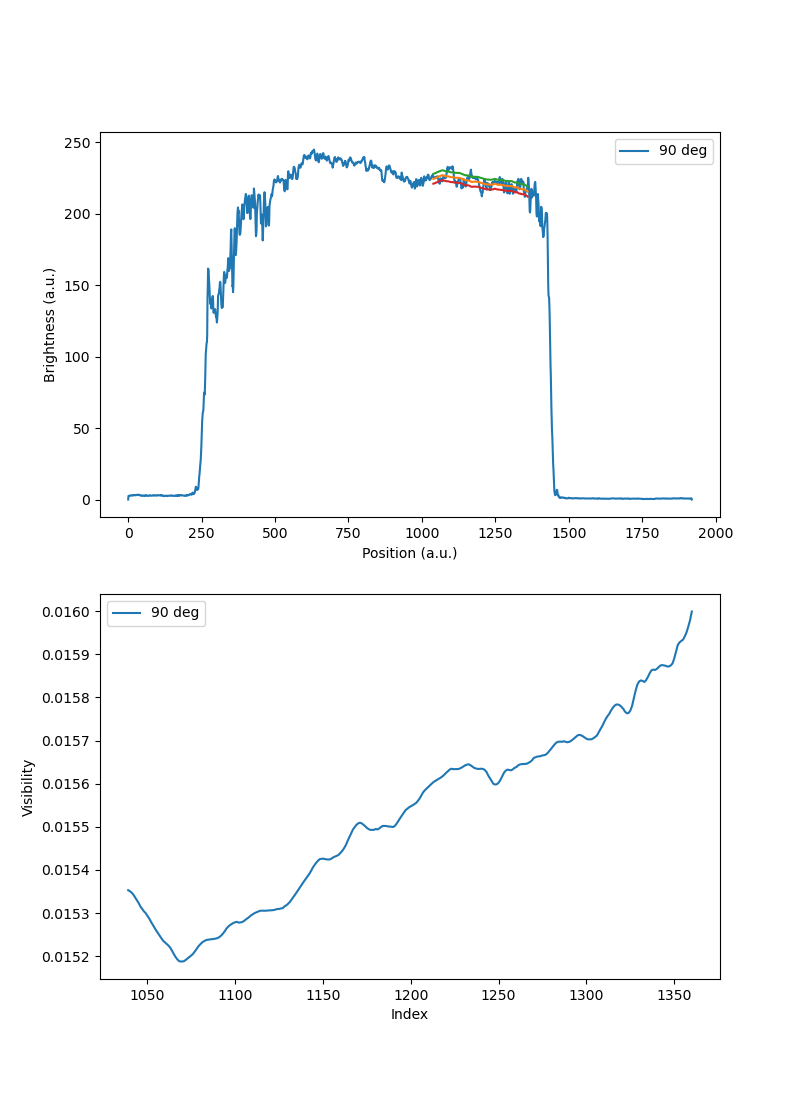

0.015528667716070395

In [5]:
down = 1000
up = 1400

avg_visibility("90pol.csv","90 deg",down,up)

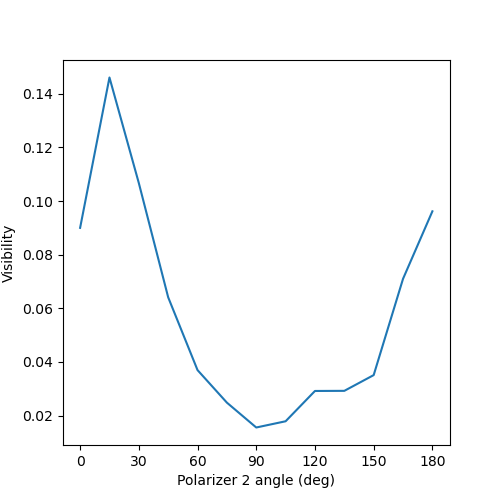

In [15]:
visibility = []
down = 1000
up = 1400

visibility.append(avg_visibility("0pol.csv","0 deg",down,up))
visibility.append(avg_visibility("15pol.csv","15 deg",down,up))
visibility.append(avg_visibility("30pol.csv","0 deg",down,up))
visibility.append(avg_visibility("45pol.csv","15 deg",down,up))
visibility.append(avg_visibility("60pol.csv","0 deg",down,up))
visibility.append(avg_visibility("75pol.csv","15 deg",down,up))
visibility.append(avg_visibility("90pol.csv","0 deg",down,up))
visibility.append(avg_visibility("105pol.csv","15 deg",down,up))
visibility.append(avg_visibility("120pol.csv","0 deg",down,up))
visibility.append(avg_visibility("135pol.csv","15 deg",down,up))
visibility.append(avg_visibility("150pol.csv","0 deg",down,up))
visibility.append(avg_visibility("165pol.csv","15 deg",down,up))
visibility.append(avg_visibility("180pol.csv","0 deg",down,up))

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(0,181,15),visibility)
ax.set_xlabel("Polarizer 2 angle (deg)")
ax.set_ylabel("Visibility")
ax.set_xticks(range(0,181,30))
plt.savefig("Pol2", dpi=300)

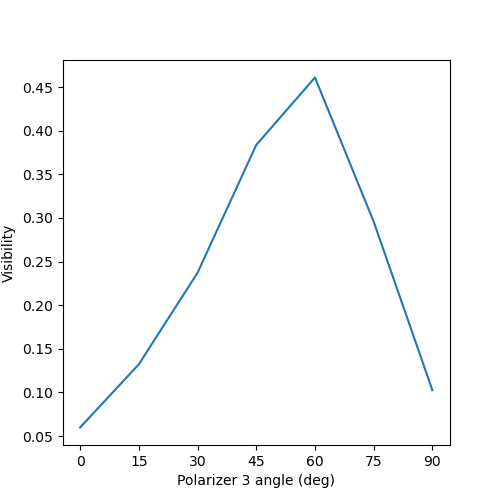

In [16]:
visibility = []
down = 1200
up = 1400

visibility.append(avg_visibility("90.0pol.csv","0 deg",down,up))
visibility.append(avg_visibility("90.15pol.csv","15 deg",down,up))
visibility.append(avg_visibility("90.30pol.csv","0 deg",down,up))
visibility.append(avg_visibility("90.45pol.csv","15 deg",down,up))
visibility.append(avg_visibility("90.60pol.csv","0 deg",down,up))
visibility.append(avg_visibility("90.75pol.csv","15 deg",down,up))
visibility.append(avg_visibility("90.90pol.csv","0 deg",down,up))

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(0,91,15),visibility)
ax.set_xlabel("Polarizer 3 angle (deg)")
ax.set_ylabel("Visibility")
ax.set_xticks(range(0,91,15))
plt.savefig("Pol3", dpi=300)

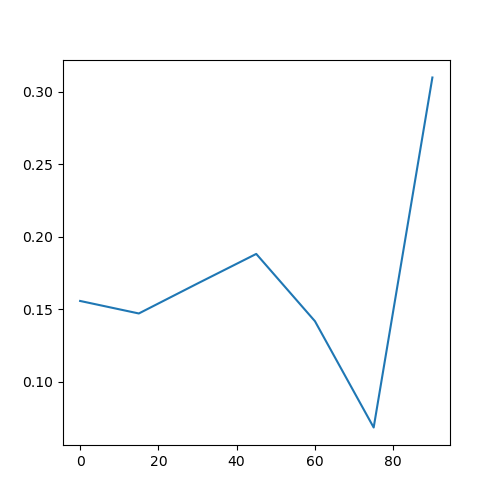

In [137]:
visibility = []
down = 1250
up = 1350

visibility.append(avg_visibility("0.0pol.csv","0 deg",down,up))
visibility.append(avg_visibility("0.15pol.csv","15 deg",down,up))
visibility.append(avg_visibility("0.30pol.csv","0 deg",down,up))
visibility.append(avg_visibility("0.45pol.csv","15 deg",down,up))
visibility.append(avg_visibility("0.60pol.csv","0 deg",down,up))
visibility.append(avg_visibility("0.75pol.csv","15 deg",down,up))
visibility.append(avg_visibility("0.90pol.csv","0 deg",down,up))

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(0,91,15),visibility)

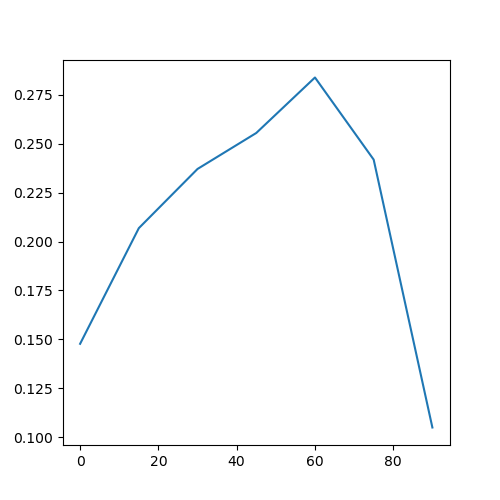

In [138]:
visibility = []
down = 1200
up = 1400

visibility.append(avg_visibility("45.0pol.csv","0 deg",down,up))
visibility.append(avg_visibility("45.15pol.csv","15 deg",down,up))
visibility.append(avg_visibility("45.30pol.csv","0 deg",down,up))
visibility.append(avg_visibility("45.45pol.csv","15 deg",down,up))
visibility.append(avg_visibility("45.60pol.csv","0 deg",down,up))
visibility.append(avg_visibility("45.75pol.csv","15 deg",down,up))
visibility.append(avg_visibility("45.90pol.csv","0 deg",down,up))

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(0,91,15),visibility)

Check for decline of brightness, like in polarizer

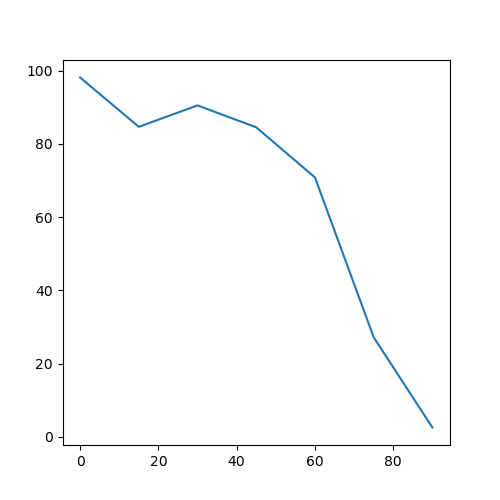

In [12]:
brightness=[]

for name in ["0.0pol.csv", "0.15pol.csv", "0.30pol.csv", "0.45pol.csv", "0.60pol.csv", "0.75pol.csv", "0.90pol.csv"]:
    brightness.append(pd.read_csv(name, header=1)["raw data"].iloc[1350])

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(0,91,15),brightness)

### **_IAGO'S CODE:_**

def avg_visibility(data,name,down,up):
    
    # Data analysis pipeline
    ds = pd.read_csv(data, header=1)
    ds_filtered = ds.loc[down:up]['raw data']
    
    peaks, _ = find_peaks(ds_filtered)
    throughs, _ = find_peaks(-ds_filtered)
    
    extrema = np.array(list(zip(peaks,throughs))).flatten()
    extrema_v = ds['raw data'][extrema].reset_index(drop=True)
    
    vis = []
    # for i in range(np.minimum(len(peaks), len(throughs))):
    for i in range(round(len(extrema_v)/2)):
        v = abs(extrema_v[2*i] - extrema_v[2*i+1]) 
        # v = (peaks[i] - throughs[i]) / (peaks[i] + throughs[i])
        vis.append(v)
        
    # Plotting
    plt.close("all")
    fig, ax = plt.subplots(1,2, figsize=(15,5))
    ax[0].plot(ds['raw data'], label=name)
    ax[0].plot(peaks + down, ds['raw data'][peaks + down], "x")
    ax[0].plot(throughs + down, ds['raw data'][throughs + down], "x")
    ax[0].legend()
    ax[0].set_ylabel("Brightness (a.u.)")
    ax[0].set_xlabel("Position (a.u.)")

    ax[1].plot(vis, label=name)
    ax[1].legend()
    ax[1].set_ylabel("Visibility")
    ax[1].set_xlabel("Index")
    
    plt.show()
        
    return np.average(vis)